In [73]:
import math

from datetime import datetime

import dill as pkl
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm as tqdm

from am_v2 import read_data

In [2]:
old_am_data = pd.read_csv('/shared/new_am_data/old_am_data.csv')
old_am_data

,student_id,start_time,content_id,user_answer,correct_answer,part,elapsed_time_in_ms,time_limit_in_ms
0,683125,2019-02-15 05:44:34.626051,4364,b,b,5,49000,25000
1,683125,2019-02-15 05:45:00.919104,4101,b,b,5,23000,25000
2,683125,2019-02-15 05:46:10.972017,368,b,b,2,67000,23177
3,683125,2019-02-15 05:47:11.322896,218,b,b,2,57000,25136
4,683125,2019-02-15 05:47:39.427028,4025,d,d,5,25000,25000
...,...,...,...,...,...,...,...,...
72907000,276730,2018-10-16 15:14:33.557893,6139,b,b,5,12000,25000
72907001,276730,2018-10-16 15:14:55.061362,6190,a,a,5,16000,25000
72907002,276730,2018-10-16 15:15:10.637637,8711,c,c,5,10000,25000
72907003,276730,2018-10-16 15:15:33.816478,5415,a,c,5,18000,25000


In [ ]:
old_am_data.head(10000).to_csv('/shared/new_am_data/old_am_data_sample.csv', index=False)

In [ ]:
old_am_data.to_csv('/shared/new_am_data/old_am_data.csv', index=False)

In [495]:
new_am_data = pd.read_csv('/shared/new_am_data/new_am_data.csv')
new_am_data

,student_id,start_time,content_id,user_answer,correct_answer,part,elapsed_time_in_ms,time_limit_in_ms,task_container_id
0,11,2017-04-20 06:01:16.676,129,b,b,1,14000,27121,305
1,11,2017-04-20 06:01:38.578,8058,b,b,1,20000,29498,9135
2,11,2017-04-20 06:02:01.915,8120,c,a,1,22000,27304,9136
3,11,2017-04-20 06:02:21.448,157,d,d,1,18000,27226,9138
4,11,2017-04-20 06:02:32.506,52,b,b,1,9000,26416,9139
...,...,...,...,...,...,...,...,...,...
116609152,1827640,2020-04-30 23:56:04.053,12882,b,b,2,21000,8000,104892918
116609153,1827640,2020-04-30 23:56:25.391,13254,c,c,2,19000,8000,104892945
116609154,1827640,2020-04-30 23:56:40.053,13183,a,b,5,12000,25000,104892960
116609155,1827640,2020-04-30 23:57:01.597,14560,b,c,2,19000,8000,104892979


In [496]:
new_am_data

,student_id,start_time,content_id,user_answer,correct_answer,part,elapsed_time_in_ms,time_limit_in_ms,task_container_id
0,11,2017-04-20 06:01:16.676,129,b,b,1,14000,27121,305
1,11,2017-04-20 06:01:38.578,8058,b,b,1,20000,29498,9135
2,11,2017-04-20 06:02:01.915,8120,c,a,1,22000,27304,9136
3,11,2017-04-20 06:02:21.448,157,d,d,1,18000,27226,9138
4,11,2017-04-20 06:02:32.506,52,b,b,1,9000,26416,9139
...,...,...,...,...,...,...,...,...,...
116609152,1827640,2020-04-30 23:56:04.053,12882,b,b,2,21000,8000,104892918
116609153,1827640,2020-04-30 23:56:25.391,13254,c,c,2,19000,8000,104892945
116609154,1827640,2020-04-30 23:56:40.053,13183,a,b,5,12000,25000,104892960
116609155,1827640,2020-04-30 23:57:01.597,14560,b,c,2,19000,8000,104892979


In [ ]:
new_am_data.head(10000).to_csv('/shared/new_am_data/new_am_data_sample.csv', index=False)

In [ ]:
new_am_data.to_csv('/shared/new_am_data/new_am_data.csv', index=False)

# Exploratory Data Analysis

Let's look at
- number of sequences per user
- number of sequences per question
- question frequency distribution per part
- percentage of correct and timely responses
- percentage of new questions in score data (later)

## Number of Users

In [8]:
old_user_ids = old_am_data.student_id.unique()
new_user_ids = new_am_data.student_id.unique()
print(len(old_user_ids), len(new_user_ids))

627347 1113653


In [9]:
old_seq_lens = []
for i in tqdm(old_am_data.groupby('student_id')):
    old_seq_lens.append(len(i[1]))
new_seq_lens = []
for i in tqdm(new_am_data.groupby('student_id')):
    new_seq_lens.append(len(i[1]))

## Number of Sequences per User

In [10]:
print(
    f'{"type":<8}'\
    f'{"mean":<8}'\
    f'{"std":<8}'\
    f'{"min":<8}'\
    f'{"max":<8}'\
    f'{"median":<8}'\
)
print(
    f'{"old":<8}'\
    f'{int(np.mean(old_seq_lens)):<8}'\
    f'{int(np.std(old_seq_lens)):<8}'\
    f'{np.min(old_seq_lens):<8}'\
    f'{np.max(old_seq_lens):<8}'\
    f'{np.median(old_seq_lens):<8}'\
)
print(
    f'{"new":<8}'\
    f'{int(np.mean(new_seq_lens)):<8}'\
    f'{int(np.std(new_seq_lens)):<8}'\
    f'{np.min(new_seq_lens):<8}'\
    f'{np.max(new_seq_lens):<8}'\
    f'{np.median(new_seq_lens):<8}'\
)

type    mean    std     min     max     median  
old     116     517     1       41644   13.0    
new     104     498     1       54412   11.0    


## Number of Questions

In [11]:
old_question_ids = old_am_data.content_id.unique()
new_question_ids = new_am_data.content_id.unique()
print(len(old_question_ids), len(new_question_ids))

16175 18149


In [12]:
print('New Questions')
print(len(set(new_question_ids) - set(old_question_ids)))

New Questions
1974


In [13]:
old_part2qids = [old_am_data[old_am_data.part == part+1].content_id.unique().tolist() for part in tqdm(range(8))]
new_part2qids = [new_am_data[new_am_data.part == part+1].content_id.unique().tolist() for part in tqdm(range(7))]

old part 2 qids
[780, 1827, 2127, 1821, 6044, 1505, 2071, 0]


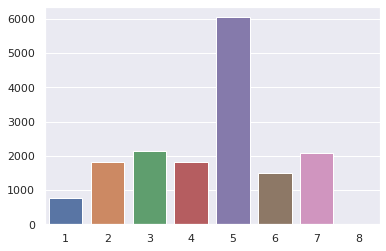

In [14]:
print('old part 2 qids')
print([len(qids) for qids in old_part2qids])
sns.barplot(x=[1,2,3,4,5,6,7,8], y=[len(qids) for qids in old_part2qids])

new part 2 qids
[1142, 2270, 2538, 2190, 6344, 1521, 2144]


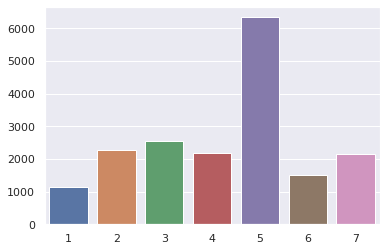

In [15]:
print('new part 2 qids')
print([len(qids) for qids in new_part2qids])
sns.barplot(x=[1,2,3,4,5,6,7], y=[len(qids) for qids in new_part2qids])

## Response Correctness

In [16]:
old_am_data[old_am_data.user_answer == old_am_data.correct_answer]

,student_id,start_time,content_id,user_answer,correct_answer,part,elapsed_time_in_ms,time_limit_in_ms
0,683125,2019-02-15 05:44:34.626051,4364,b,b,5,49000,25000
1,683125,2019-02-15 05:45:00.919104,4101,b,b,5,23000,25000
2,683125,2019-02-15 05:46:10.972017,368,b,b,2,67000,23177
3,683125,2019-02-15 05:47:11.322896,218,b,b,2,57000,25136
4,683125,2019-02-15 05:47:39.427028,4025,d,d,5,25000,25000
...,...,...,...,...,...,...,...,...
72906999,276730,2018-10-16 15:14:12.620177,4544,d,d,5,19000,25000
72907000,276730,2018-10-16 15:14:33.557893,6139,b,b,5,12000,25000
72907001,276730,2018-10-16 15:14:55.061362,6190,a,a,5,16000,25000
72907002,276730,2018-10-16 15:15:10.637637,8711,c,c,5,10000,25000


In [17]:
print('Old data ratio:', 48154305 / 72907005)

Old data ratio: 0.6604894138773085


In [18]:
new_am_data[new_am_data.user_answer == new_am_data.correct_answer]

,student_id,start_time,content_id,user_answer,correct_answer,part,elapsed_time_in_ms,time_limit_in_ms,task_container_id
0,11,2017-04-20 06:01:16.676,129,b,b,1,14000,27121,305
1,11,2017-04-20 06:01:38.578,8058,b,b,1,20000,29498,9135
3,11,2017-04-20 06:02:21.448,157,d,d,1,18000,27226,9138
4,11,2017-04-20 06:02:32.506,52,b,b,1,9000,26416,9139
5,11,2017-04-20 06:02:56.072,51,c,c,1,22000,27252,9140
...,...,...,...,...,...,...,...,...,...
116609150,1827640,2020-04-30 23:55:25.272,16509,c,c,2,21000,8000,104892880
116609151,1827640,2020-04-30 23:55:40.588,16113,c,c,5,12000,25000,104892908
116609152,1827640,2020-04-30 23:56:04.053,12882,b,b,2,21000,8000,104892918
116609153,1827640,2020-04-30 23:56:25.391,13254,c,c,2,19000,8000,104892945


In [19]:
print('New data ratio:', 75088282 / 116609157)

New data ratio: 0.6439312651921495


## Timeliness

In [4]:
time_limits = pd.read_csv('am_v2/tmp/time_limits.csv')
time_limits

,question_id,eq_id,part_number,question_count,time_limit_in_ms,audio_duration_in_ms
0,1,p1-121,1,1,26076.734694,18076.734694
1,2,p1-122,1,1,26599.183673,18599.183673
2,3,p1-123,1,1,28192.653061,20192.653061
3,4,p1-124,1,1,27069.387755,19069.387755
4,5,p1-125,1,1,27513.469388,19513.469388
...,...,...,...,...,...,...
17738,17739,p7d-067,7,5,55000.000000,0.000000
17739,17740,p7d-067,7,5,55000.000000,0.000000
17740,17741,p7d-067,7,5,55000.000000,0.000000
17741,17742,p7d-067,7,5,55000.000000,0.000000


In [5]:
# qid2limit = time_limits.set_index('question_id').time_limit_in_ms.astype(int).to_dict()
# old_am_data.elapsed_time_in_ms = old_am_data.elapsed_time_in_ms.astype(int)
# old_am_data['time_limit_in_ms'] = old_am_data.content_id.map(qid2limit).astype(int)
print(len(old_am_data[old_am_data.time_limit_in_ms.isnull()].content_id.unique()))

0


1650


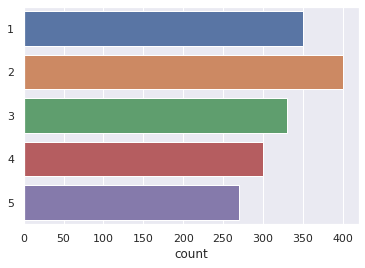

In [20]:
time_limits.groupby('part_number').mean().astype(int).time_limit_in_ms.to_dict()
qid2part = {qid: part+1 for part, qids in enumerate(new_part2qids) for qid in qids}
qid_diff = set(qid2part.keys()) - set(time_limits.question_id.unique())
print(len(qid_diff))
qid_diff_parts = [qid2part[qid] for qid in qid_diff]
sns.countplot(y=qid_diff_parts)

In [7]:
# avg_times = time_limits.groupby('part_number').mean().astype(int).time_limit_in_ms.to_dict()
# qid2avg = {qid: avg_times[qid2part[qid]] for qid in qid_diff}
# qid2limit = time_limits.set_index('question_id').time_limit_in_ms.astype(int).to_dict()
# qid2limit.update(qid2avg)
# new_am_data['time_limit_in_ms'] = new_am_data.content_id.map(qid2limit)
print(len(new_am_data[new_am_data.time_limit_in_ms.isnull()].content_id.unique()))

0


In [21]:
old_am_data[old_am_data.elapsed_time_in_ms <= old_am_data.time_limit_in_ms]

,student_id,start_time,content_id,user_answer,correct_answer,part,elapsed_time_in_ms,time_limit_in_ms
1,683125,2019-02-15 05:45:00.919104,4101,b,b,5,23000,25000
4,683125,2019-02-15 05:47:39.427028,4025,d,d,5,25000,25000
13,368086,2018-10-23 10:23:00.002334,8671,a,c,5,5000,25000
14,368086,2018-10-23 10:23:18.819642,4792,b,b,5,16000,25000
16,368086,2018-10-23 10:24:11.279016,8061,b,b,1,16000,26964
...,...,...,...,...,...,...,...,...
72907000,276730,2018-10-16 15:14:33.557893,6139,b,b,5,12000,25000
72907001,276730,2018-10-16 15:14:55.061362,6190,a,a,5,16000,25000
72907002,276730,2018-10-16 15:15:10.637637,8711,c,c,5,10000,25000
72907003,276730,2018-10-16 15:15:33.816478,5415,a,c,5,18000,25000


In [23]:
print('Old data ratio:', 57129609 / 72907005)

Old data ratio: 0.7835956092284959


In [22]:
new_am_data[new_am_data.elapsed_time_in_ms <= new_am_data.time_limit_in_ms]

,student_id,start_time,content_id,user_answer,correct_answer,part,elapsed_time_in_ms,time_limit_in_ms,task_container_id
0,11,2017-04-20 06:01:16.676,129,b,b,1,14000,27121,305
1,11,2017-04-20 06:01:38.578,8058,b,b,1,20000,29498,9135
2,11,2017-04-20 06:02:01.915,8120,c,a,1,22000,27304,9136
3,11,2017-04-20 06:02:21.448,157,d,d,1,18000,27226,9138
4,11,2017-04-20 06:02:32.506,52,b,b,1,9000,26416,9139
...,...,...,...,...,...,...,...,...,...
116609144,1827637,2020-04-30 23:53:21.756,5470,a,a,5,7000,25000,104892756
116609145,1827637,2020-04-30 23:53:32.201,4445,a,d,5,5000,25000,104892777
116609149,1827640,2020-04-30 23:55:01.394,15785,b,c,5,22000,25000,104892856
116609151,1827640,2020-04-30 23:55:40.588,16113,c,c,5,12000,25000,104892908


In [24]:
print('New data ratio:', 86485289 / 116609157)

New data ratio: 0.7416680750037495


# Score Data Analysis

In [2]:
pk2id = pd.read_csv("/shared/new_am_data/students_final_ver2.csv").set_index("pk").id.to_dict()

In [91]:
score_data = pd.read_csv('/shared/new_am_data/score_filter.csv')
score_data

,user_id,lc_score,rc_score,test_date,updated_at,VALID,etc,from
0,8f4a2836-2a78-11e7-8836-d209cc02cd2b,285,240,2016.9.25,NaN,NaN,NaN,origin
1,8f4a2836-2a78-11e7-8836-d209cc02cd2b,315,280,2017.10.29,NaN,NaN,NaN,origin
2,42688492-8804-11e7-b7ee-82a26285dc90,395,365,2017.10.29,NaN,NaN,NaN,origin
3,42688492-8804-11e7-b7ee-82a26285dc90,420,310,2017.10.15,NaN,NaN,NaN,origin
4,42688492-8804-11e7-b7ee-82a26285dc90,400,280,2017.9.9,NaN,NaN,NaN,origin
...,...,...,...,...,...,...,...,...
12846,a9bd8b36-5e62-11e7-b2b6-eaa1632eec6d,435,230,2019.9.8,NaN,NaN,NaN,new
12847,43911cc6-f55a-11e7-99c9-b228b61532df,340,280,2020.5.16,NaN,NaN,NaN,new
12848,43911cc6-f55a-11e7-99c9-b228b61532df,325,265,2020.5.3,NaN,NaN,NaN,new
12849,43911cc6-f55a-11e7-99c9-b228b61532df,295,275,2020.4.26,NaN,NaN,NaN,new


In [92]:
score_data.user_id = score_data.user_id.map(pk2id)
score_data = score_data.sort_values(["user_id", "test_date"])
users = set(score_data.user_id.unique())
print(len(users))
score_data

5700


,user_id,lc_score,rc_score,test_date,updated_at,VALID,etc,from
11143,31,390,290,2017.12.30,NaN,NaN,NaN,origin
11142,31,380,355,2018.5.27,NaN,NaN,NaN,origin
11141,31,355,310,2018.9.15,NaN,NaN,NaN,origin
11140,31,375,305,2019.1.12,NaN,NaN,NaN,origin
41,53,430,375,2017.5.14,NaN,NaN,NaN,origin
...,...,...,...,...,...,...,...,...
12715,1866046,315,240,2018.10.14,NaN,NaN,NaN,new
12713,1866046,395,205,2019.11.24,NaN,NaN,NaN,new
12714,1866046,375,165,2019.9.8,NaN,NaN,NaN,new
12712,1866046,325,185,2020.1.19,NaN,NaN,NaN,new


In [5]:
tcr = pd.read_csv("/shared/new_am_data/tcr.csv")
tcr = tcr.query("student_id in @users")

In [6]:
tcr = tcr[tcr.content_type_abrg == 1]
tcr = tcr.drop("content_type_abrg", axis=1)
tcr = tcr.dropna(subset=["task_container_id", "part"])  # 243 rows
tcr.rename(columns={"updated_at": "start_time"}, inplace=True)
tcr.elapsed_time_in_ms = tcr.elapsed_time_in_ms.astype(int)
tcr.task_container_id = tcr.task_container_id.astype(int)
tcr.part = tcr.part.astype(int)
tcr = tcr.sort_values(["student_id", "start_time"])
tcr

,student_id,start_time,content_id,user_answer,correct_answer,elapsed_time_in_ms,task_container_id,part
13562016,31,2017-04-18 03:34:13.083,129,b,b,13000,926,1
8604947,31,2017-04-18 03:34:35.297,8058,b,b,21000,931,1
8604949,31,2017-04-18 03:34:53.276,8120,b,a,16000,935,1
11822734,31,2017-04-18 03:35:13.450,157,d,d,19000,939,1
10871407,31,2017-04-18 03:35:31.324,52,b,b,16000,942,1
...,...,...,...,...,...,...,...,...
117625824,1823926,2020-04-30 14:59:19.432,7974,a,a,32200,104865562,7
117625825,1823926,2020-04-30 14:59:19.469,7976,b,a,32200,104865562,7
119961773,1823926,2020-04-30 14:59:19.479,7973,a,b,32200,104865562,7
119961774,1823926,2020-04-30 14:59:19.497,7975,d,d,32200,104865562,7


In [7]:
time_limits = pd.read_csv("am_v2/tmp/time_limits.csv")
part2qids = [
    tcr[tcr.part == part].content_id.unique().tolist() for part in range(1, 8)
]
qid2part = {qid: part + 1 for part, qids in enumerate(part2qids) for qid in qids}
avg_times = (
    time_limits.groupby("part_number").mean().astype(int).time_limit_in_ms.to_dict()
)
qid_diff = set(qid2part.keys()) - set(time_limits.question_id.unique())
qid2avg = {qid: avg_times[qid2part[qid]] for qid in qid_diff}
qid2limit = (
    time_limits.set_index("question_id").time_limit_in_ms.astype(int).to_dict()
)
qid2limit.update(qid2avg)
tcr["time_limit_in_ms"] = tcr.content_id.map(qid2limit)
col = tcr.pop("part")
tcr.insert(5, col.name, col)
col = tcr.pop("time_limit_in_ms")
tcr.insert(7, col.name, col)
tcr

,student_id,start_time,content_id,user_answer,correct_answer,part,elapsed_time_in_ms,time_limit_in_ms,task_container_id
13562016,31,2017-04-18 03:34:13.083,129,b,b,1,13000,27121,926
8604947,31,2017-04-18 03:34:35.297,8058,b,b,1,21000,29498,931
8604949,31,2017-04-18 03:34:53.276,8120,b,a,1,16000,27304,935
11822734,31,2017-04-18 03:35:13.450,157,d,d,1,19000,27226,939
10871407,31,2017-04-18 03:35:31.324,52,b,b,1,16000,26416,942
...,...,...,...,...,...,...,...,...,...
117625824,1823926,2020-04-30 14:59:19.432,7974,a,a,7,32200,55000,104865562
117625825,1823926,2020-04-30 14:59:19.469,7976,b,a,7,32200,55000,104865562
119961773,1823926,2020-04-30 14:59:19.479,7973,a,b,7,32200,55000,104865562
119961774,1823926,2020-04-30 14:59:19.497,7975,d,d,7,32200,55000,104865562


In [8]:
grouped_by_users = tcr[tcr.student_id.isin(users)].groupby("student_id")
tcr_users = set(tcr.student_id.unique())
score_by_users = score_data[score_data.user_id.isin(tcr_users)].groupby("user_id")

In [97]:
len(tcr_users)

5680

In [99]:
id2pk = {v: k for k, v in pk2id.items()}
print(len(tcr_users))
train_users, test_users = train_test_split(list(tcr_users), test_size=0.2)
val_users, test_users = train_test_split(list(test_users), test_size=0.5)
print(len(train_users), len(val_users), len(test_users))



5680
4544 568 568


In [11]:
import seaborn as sns; sns.set()

In [12]:
scores = []
for user in tqdm(score_by_users):
    scores.append(max(user[1].lc_score + user[1].rc_score))

In [38]:
corrects = []
on_times = []
elapsed_times = []
nums = []
users = []
score_interactions = []

for user in tqdm(grouped_by_users):
    uid = user[0]
    user_data = user[1]
    
    score_data = score_by_users.get_group(uid)
    score_data.test_date = pd.to_datetime(score_data.test_date, format='%Y-%m-%d')
    user_data.start_time = pd.to_datetime(user_data.start_time, format='%Y.%m.%d %H:%M:%S')
    
    score_interaction = []
    for score_date in score_data.test_date.values:
        score_interaction.append(len(user_data[user_data.start_time <= score_date].start_time))
    score_interactions.append(max(score_interaction))
        
        
    num_interactions = user_data.shape[0]
    is_corrects = (
        (user[1].correct_answer == user[1].user_answer)
        .values.tolist()
    )
    is_on_times = (
        (user[1].elapsed_time_in_ms <= user[1].time_limit_in_ms)
        .values.tolist()
    )
    users.append(uid)
    corrects.append(sum(is_corrects))
    on_times.append(sum(is_on_times))
    elapsed_times.append(np.mean(user[1].elapsed_time_in_ms))
    nums.append(num_interactions)

In [63]:
print([np.mean(scores), np.std(scores), np.median(scores), np.min(scores), np.max(scores), 
       sum(np.array(scores) < 100)])
print([np.mean(nums), np.std(nums), np.median(nums), np.min(nums), np.max(nums)])
print([np.mean(score_interactions), np.std(score_interactions), np.median(score_interactions), 
       np.min(score_interactions), np.max(score_interactions), 
       sum(np.array(score_interactions) < 10)])
print([np.mean(corrects), np.std(corrects), np.median(corrects), np.min(corrects), np.max(corrects)])
print([np.mean(on_times), np.std(on_times), np.median(on_times), np.min(on_times), np.max(on_times)])
print([np.mean(elapsed_times), np.std(elapsed_times), np.median(elapsed_times), np.min(elapsed_times), 
       np.max(elapsed_times)])

[765.6580985915493, 133.0491503666448, 785.0, 10, 990, 1]
[1806.674471830986, 2377.510413000494, 1041.5, 2, 31219]
[1281.8730633802818, 1810.7800019331944, 705.5, 0, 24101, 75]
[1272.706338028169, 1777.3573805312321, 696.0, 1, 23937]
[1440.1387323943661, 1973.0002061580738, 810.0, 2, 26918]
[26436.856894634475, 7811.587303860789, 25458.74686144627, 3795.7956058588547, 180524.2045779685]


In [53]:
print(scores[np.argmin(scores)])
grouped_by_users.get_group(users[np.argmin(scores)])

10


,student_id,start_time,content_id,user_answer,correct_answer,part,elapsed_time_in_ms,time_limit_in_ms,task_container_id
54484570,814400,2019-04-18 17:31:46.872,4563,a,a,5,19000,25000,53281734
86525512,814400,2019-04-18 17:31:57.060,4689,a,a,5,6000,25000,53423987
170191511,814400,2019-04-18 17:32:26.912,6528,d,d,5,27000,25000,53423995
1536444,814400,2019-04-18 17:33:05.179,4025,d,d,5,35000,25000,53424016
134620256,814400,2019-04-18 17:33:37.259,4598,c,c,5,29000,25000,53424048
...,...,...,...,...,...,...,...,...,...
160164870,814400,2020-04-30 08:34:36.748,17055,d,d,5,17000,25000,104817180
38894116,814400,2020-04-30 08:36:34.000,19290,c,c,5,17000,25000,104817488
164492441,814400,2020-04-30 08:36:56.040,9519,c,d,5,16000,25000,104817545
57589507,814400,2020-04-30 08:37:54.219,3656,a,a,5,27000,25000,104817624


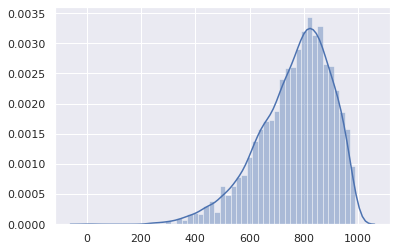

In [16]:
sns.distplot(scores, norm_hist=True)

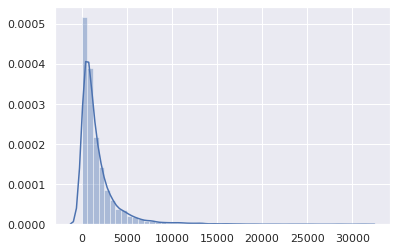

In [17]:
sns.distplot(nums, norm_hist=True)

In [18]:
r_accs = np.array(corrects) / np.array(nums)
t_accs = np.array(on_times) / np.array(nums)

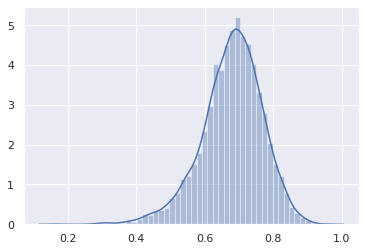

In [19]:
sns.distplot(r_accs, norm_hist=True)

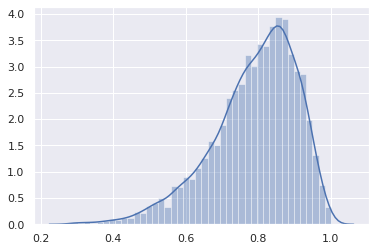

In [20]:
sns.distplot(t_accs, norm_hist=True)

In [21]:
uids = np.argsort(users)

In [22]:
from scipy import stats

print(stats.spearmanr(uids, scores), '\nPearsonrResult', stats.pearsonr(uids, scores))
print(stats.spearmanr(r_accs, scores), '\nPearsonrResult', stats.pearsonr(r_accs, scores))
print(stats.spearmanr(t_accs, scores), '\nPearsonrResult', stats.pearsonr(t_accs, scores))
print(stats.spearmanr(r_accs, t_accs), '\nPearsonrResult', stats.pearsonr(r_accs, t_accs))

SpearmanrResult(correlation=0.07932357214230924, pvalue=2.1453490572037004e-09) 
PearsonrResult (0.07682754382468607, 6.7325737981887015e-09)
SpearmanrResult(correlation=0.597862648901532, pvalue=0.0) 
PearsonrResult (0.6211719209442772, 0.0)
SpearmanrResult(correlation=0.22740273907173222, pvalue=1.584939443666873e-67) 
PearsonrResult (0.2327601577310185, 9.559463497635456e-71)
SpearmanrResult(correlation=0.1945371312893271, pvalue=1.4687910290938257e-49) 
PearsonrResult (0.19541176413848993, 5.344352118422586e-50)


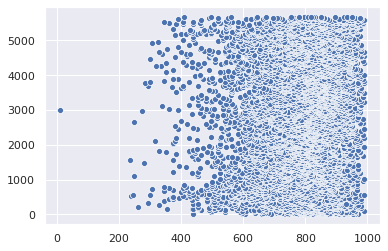

In [23]:
sns.scatterplot(scores, uids)

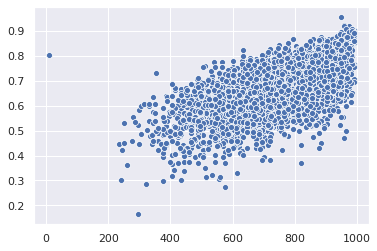

In [24]:
sns.scatterplot(scores, r_accs)

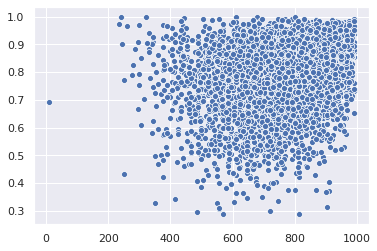

In [25]:
sns.scatterplot(scores, t_accs)

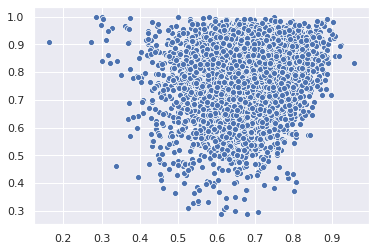

In [26]:
sns.scatterplot(r_accs, t_accs)

In [27]:
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
X = np.vstack([r_accs, t_accs, elapsed_times]).T
print(X.shape)
Y = np.array(scores)
print(Y.shape)

(5680, 3)
(5680,)


In [29]:
maes = []
best_split = []
best_mae = 1000
for i in tqdm(range(1000)):
    us = np.random.permutation(uids)
    X = np.vstack([us, r_accs, t_accs, elapsed_times]).T
    Y = np.array(scores)
    X_train, X_dev, Y_train, Y_dev = train_test_split(X, Y, test_size=0.2,)# random_state=50)
    X_dev, X_test, Y_dev, Y_test = train_test_split(X_dev, Y_dev, test_size=0.5,)# random_state=50)
    model = LinearSVR(C=100)#, loss='squared_epsilon_insensitive')
    regr = make_pipeline(StandardScaler(), model)
    regr.fit(X_train, Y_train)
    mae = mean_absolute_error(Y_test, regr.predict(X_test))
    if mae < best_mae:
        best_mae = mae
        best_split = (X_train, X_dev, Y_train, Y_dev, X_test, Y_test)
    maes.append(mae)
print(np.mean(maes), np.std(maes), np.min(maes), np.median(maes), np.max(maes))
print(best_mae)

X_train, X_dev, Y_train, Y_dev, X_test, Y_test = best_split
model = LinearSVR(C=100)
regr = make_pipeline(StandardScaler(), model)
regr.fit(X_train, Y_train)
print(mean_absolute_error(Y_train, regr.predict(X_train)))
print(mean_absolute_error(Y_dev, regr.predict(X_dev)))
print(mean_absolute_error(Y_test, regr.predict(X_test)))


79.79357241079485 2.643318448458255 71.38746933653854 79.82548236722941 87.9042073843308
71.38746933653854
80.5644997152787
79.71888649396108
71.4615484907572
